#Classification



---



###This task is prepared and completed by:


Student Name: **Nayanika Dubey**

University ID: **2408008**

Herald Student ID: **230377**



---



#Classification Task

Classificatioin refers to the process of finding a function that divides a datatset into classes based on different parameters. An algorithm is trained on a dataset, and based on the training it categorizes data into different categories.

I will be working on the datatset **Air Quality and Pollution Assessment** which can be found on Kaggle at the following url:


https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data

###Problem Statement:

In this task, I will try to predict the **Air Quality** implementing logistic regressioin from scratch as well as by using other python libraies. I will be using the sodtmax function as the data I am working with is multivariant in nature.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
path = '/content/drive/MyDrive/CTAI Assessment/pollution_dataset.csv'
df = pd.read_csv(path)

### Basic Data Preprocessing and Visualization

In [4]:
# Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air_Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


In [5]:
# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air_Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


In [6]:
# Defining two variables to store the values returned by .shape()
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 5000
Number of columns: 10


In [7]:
# Using .dtypes to check datatypes
print("Colums and their data types are as follows: ")
print(df.dtypes)

Colums and their data types are as follows: 
Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air_Quality                       object
dtype: object


In [8]:
# Display basic stats of the dataset
print("Dataset Details:")
print(df.describe())

Dataset Details:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                     

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air_Quality                      0
dtype: int64


In [10]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(df.head())


Data after basic cleaning:
   temperature  humidity  pm2.5  pm10   no2   so2    co  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   proximity_to_industrial_areas  population_density air_quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


### Visualization

<Figure size 1600x1000 with 0 Axes>

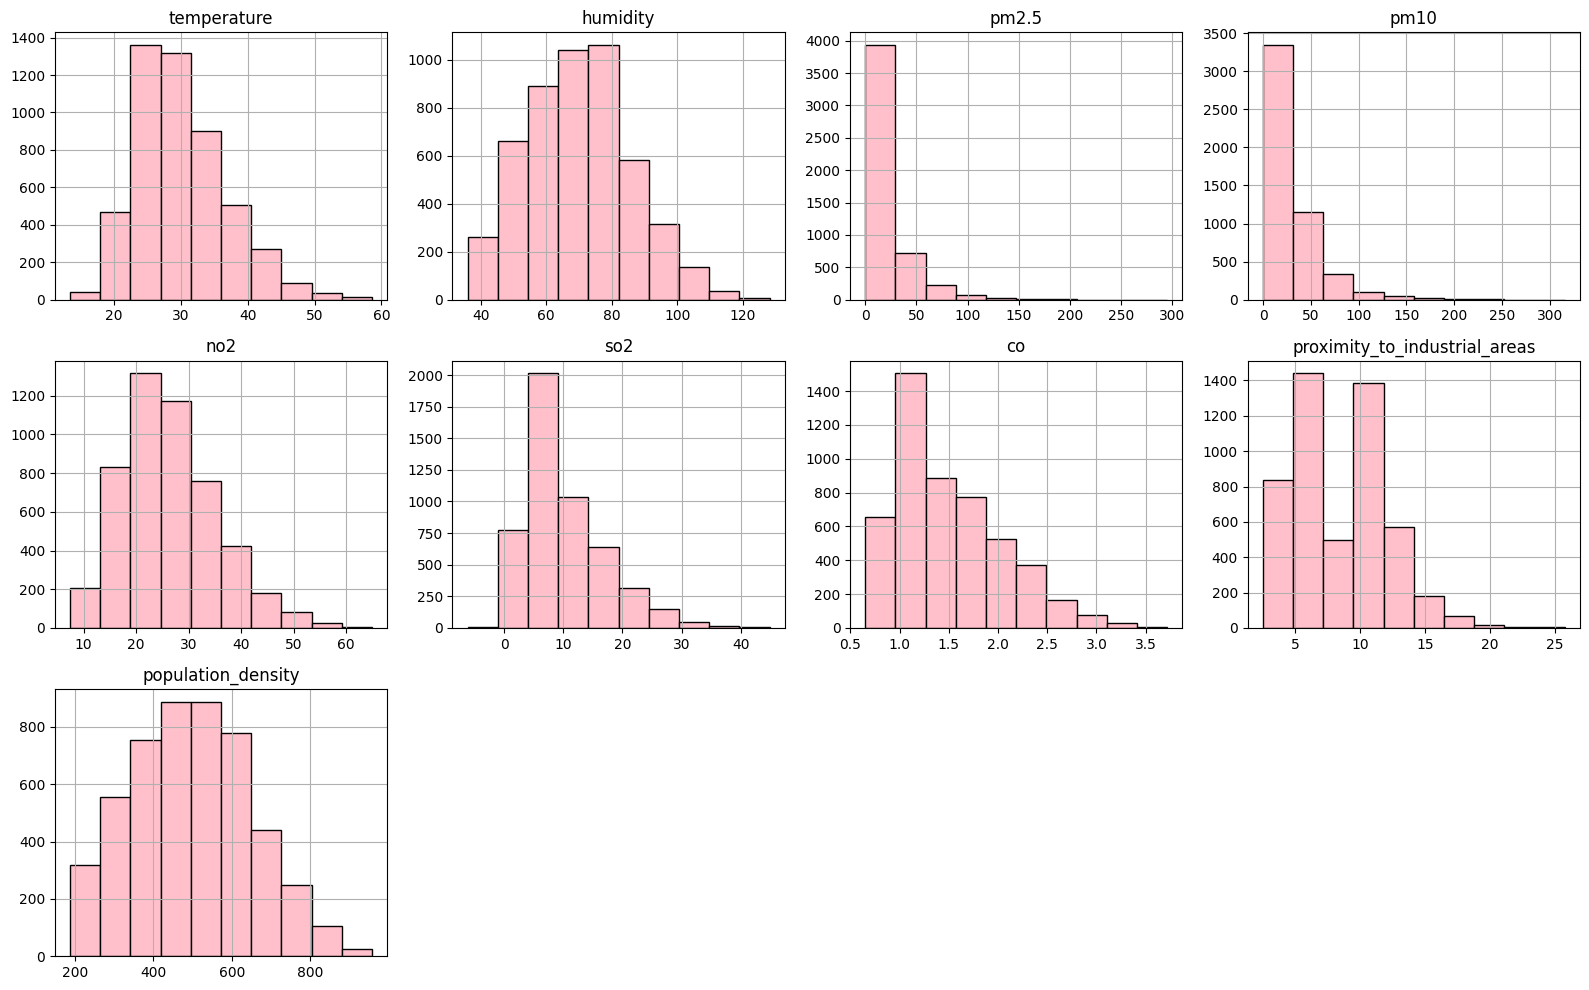

In [11]:
plt.figure(figsize=(16, 10))
df.drop(columns=['air_quality']).hist(figsize=(16, 10), layout=(3, 4), color='pink', edgecolor='black')
plt.tight_layout()
plt.show()

<ipython-input-12-6f708dd8b913>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='air_quality', palette='rocket')


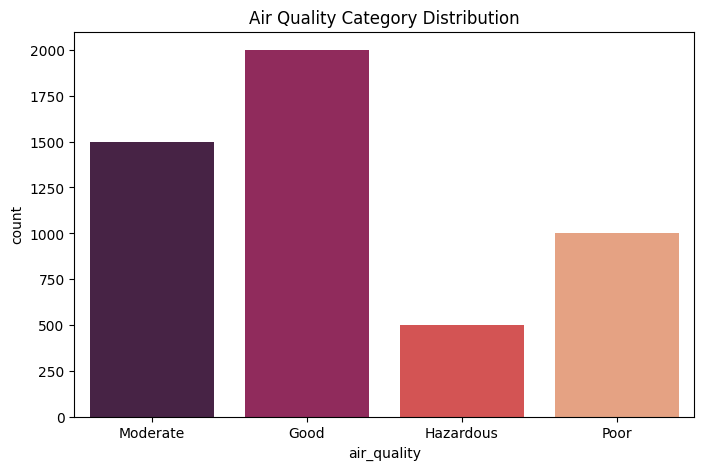

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='air_quality', palette='rocket')
plt.title('Air Quality Category Distribution')
plt.show()

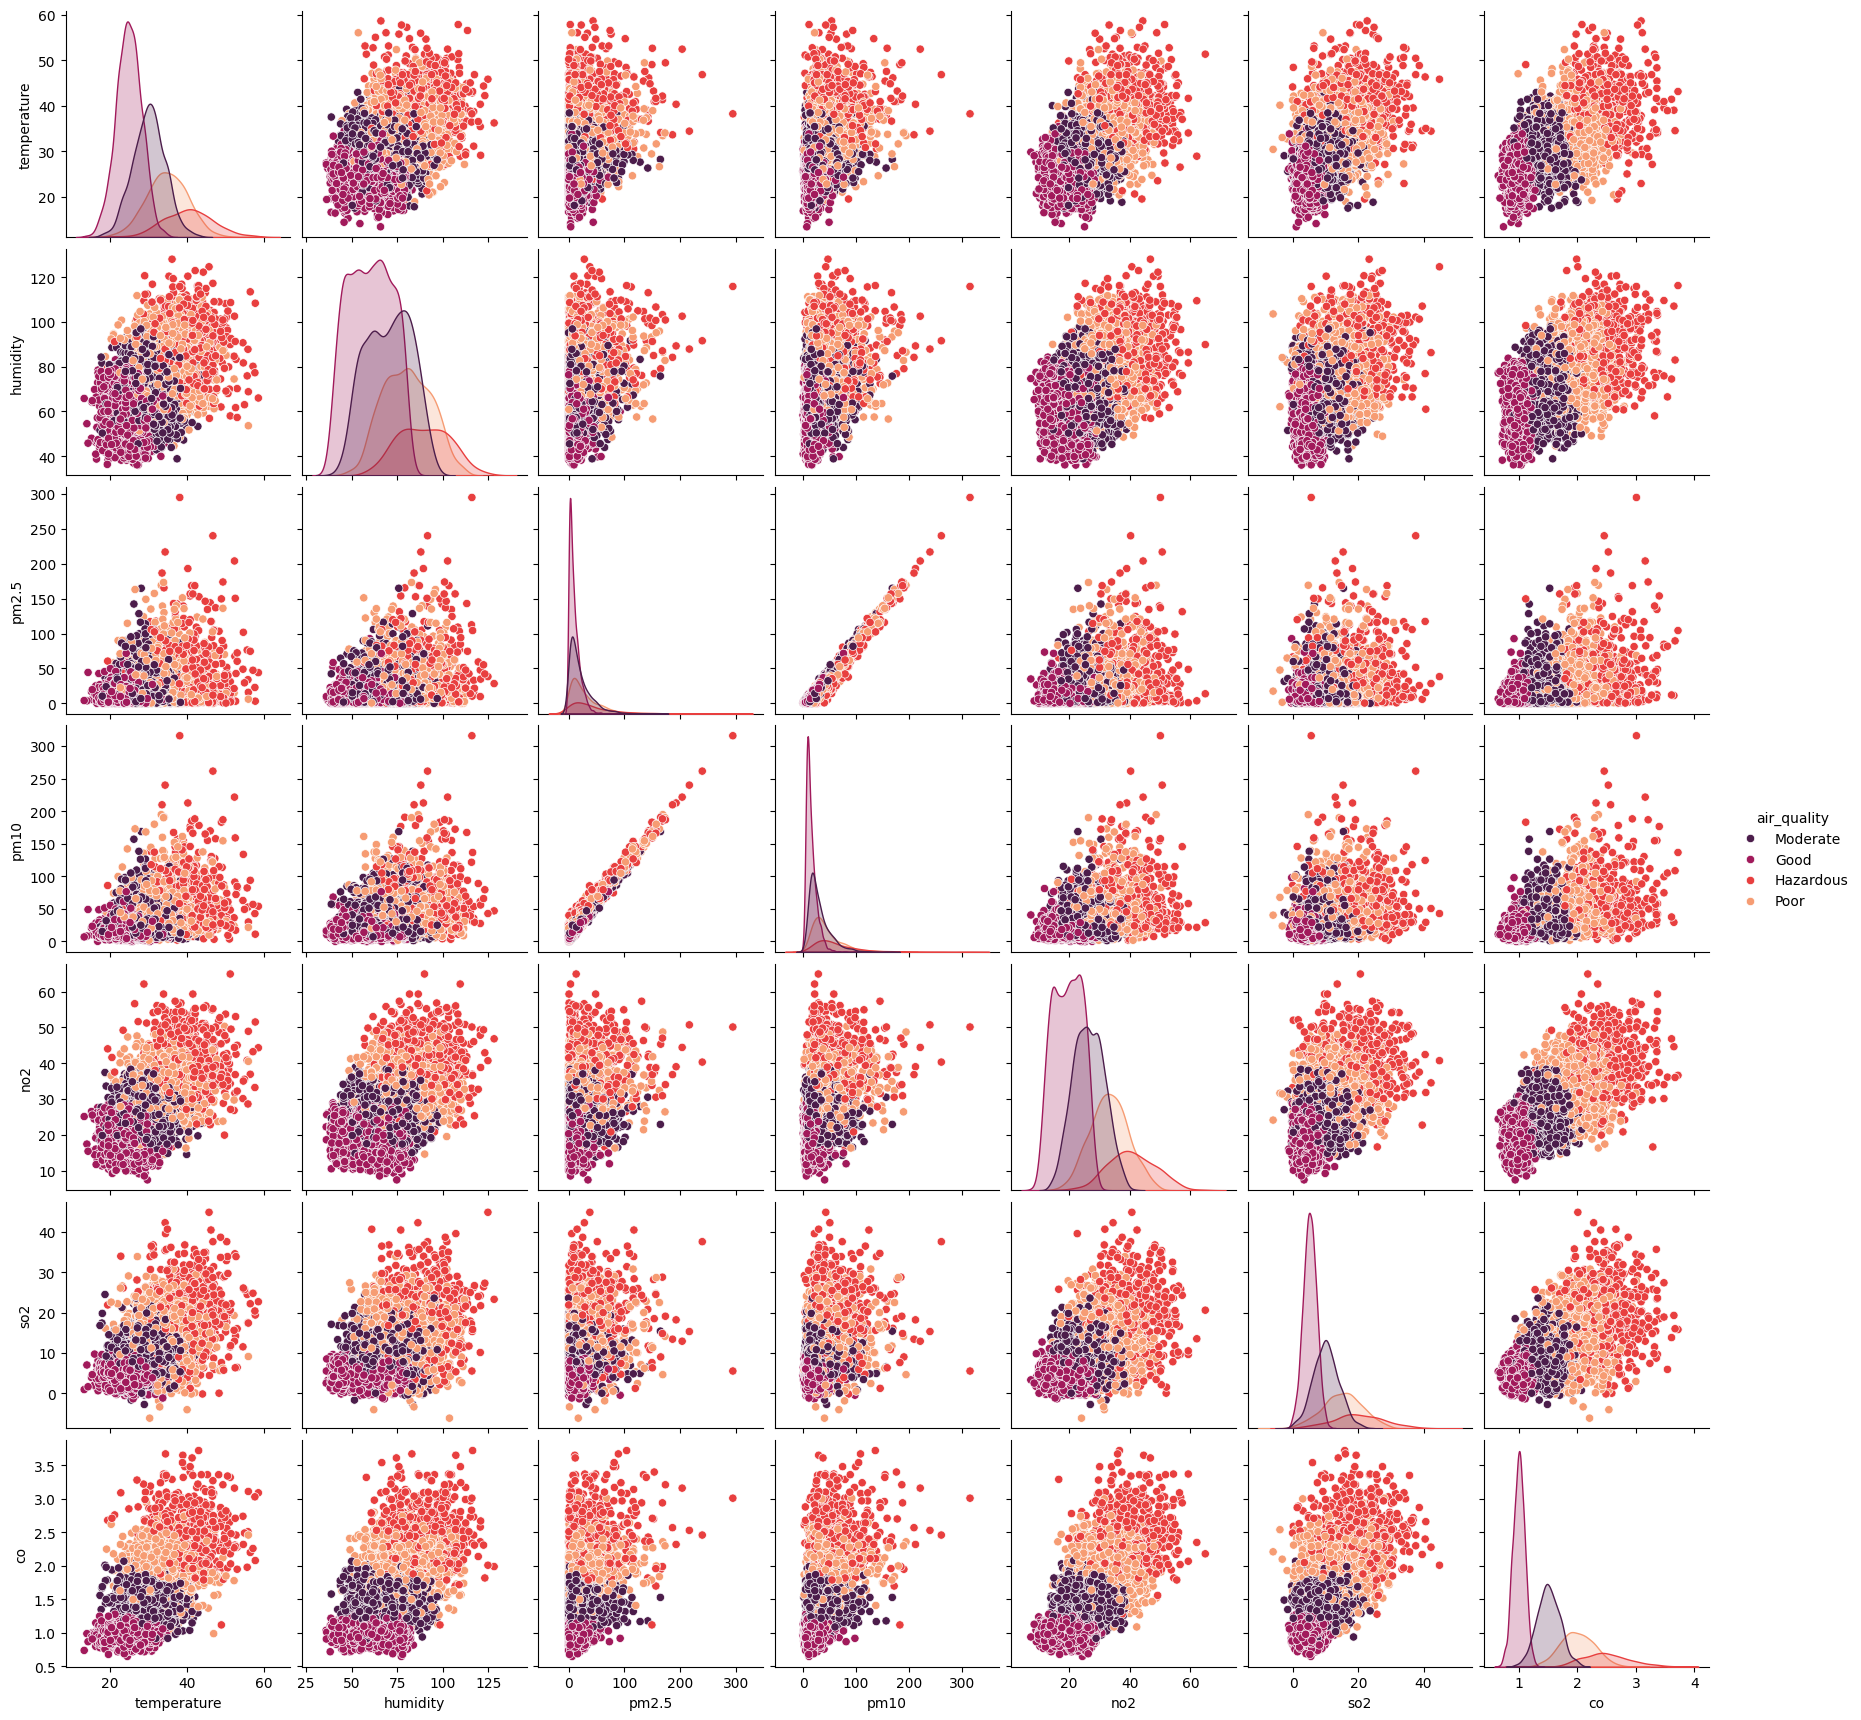

In [13]:
selected_features = ['temperature', 'humidity', 'pm2.5', 'pm10', 'no2', 'so2', 'co']
sns.pairplot(df[selected_features + ['air_quality']], hue='air_quality', palette='rocket')
plt.show()

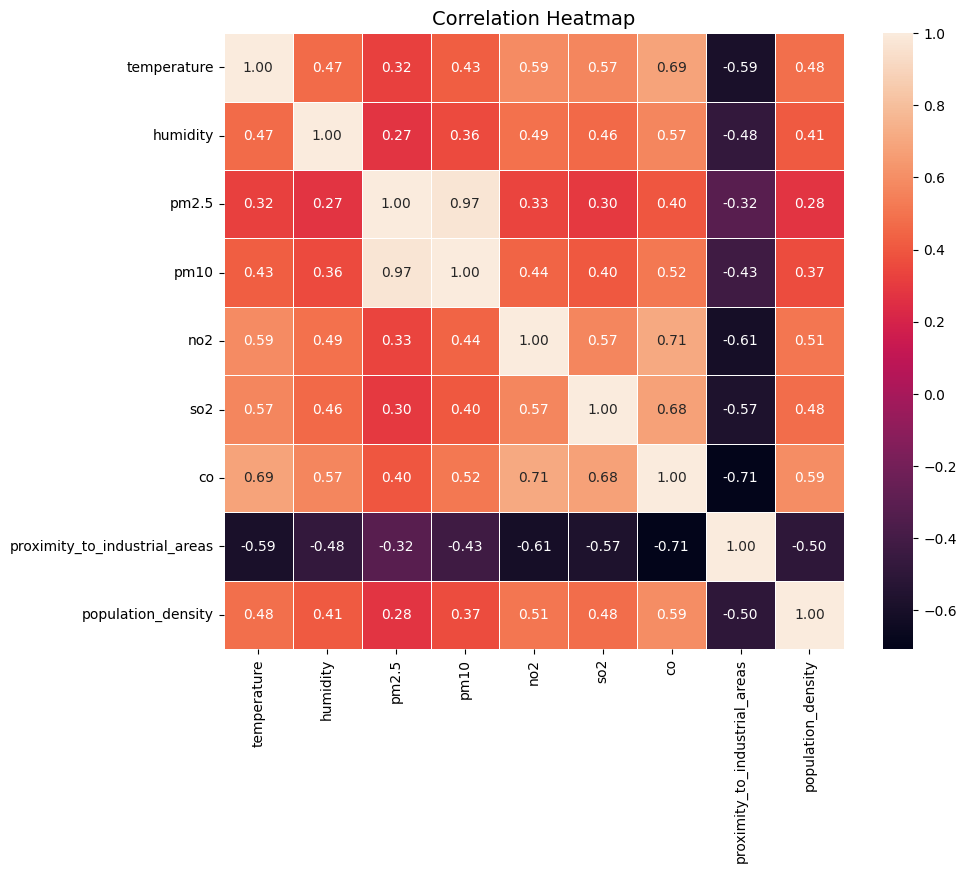

In [14]:
num=df.select_dtypes(include="number")
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(num.corr(), annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

<Axes: >

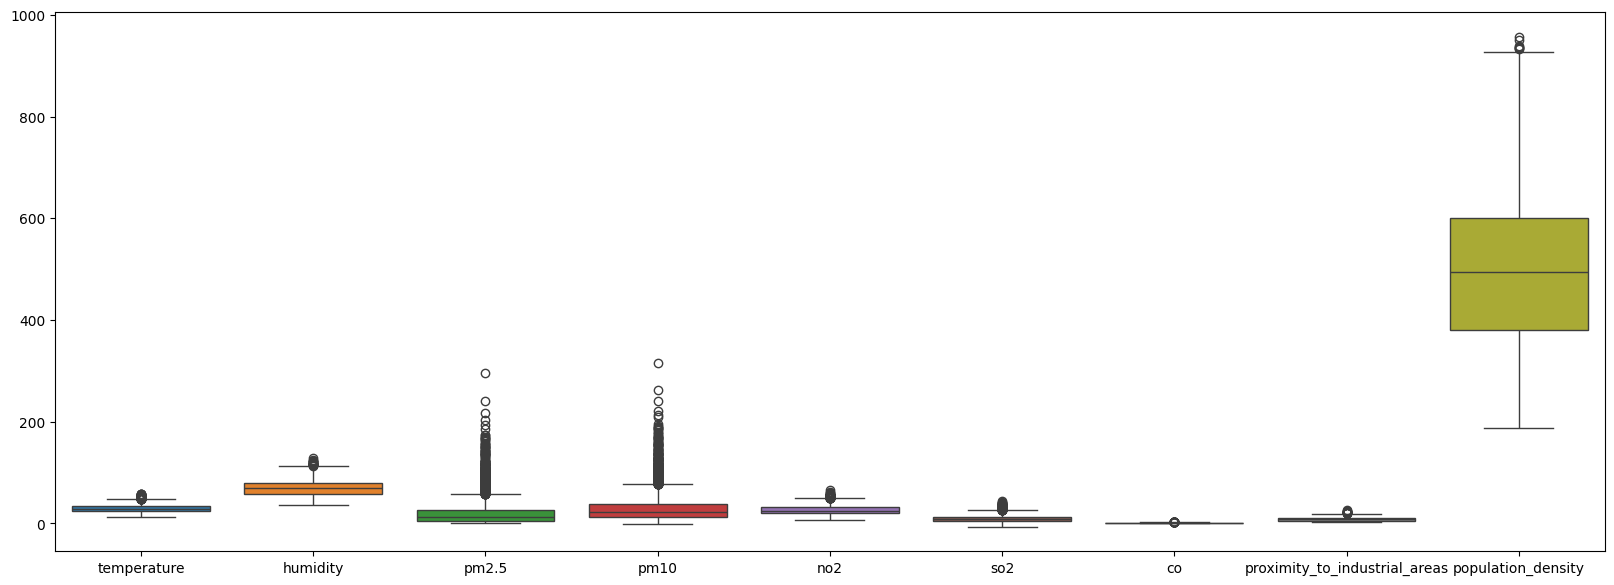

In [15]:
plt.figure(figsize=(20, 7))
sns.boxplot(num)

In [16]:
def softmax(z):
  """
  Compute the softmax of a 2D numpy array along the specified axis.
  Parameters:
  z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples

  and n is the number of classes.

  Returns:
  numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where
  each row sums to 1 and represents the probability distribution
  over classes for a sample.

  Notes:
  - Applies a normalization trick to prevent numerical instability by subtracting
  the max value in each row before exponentiation.
  """
  # Normalize input to prevent numerical instability
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [17]:
def test_softmax():
  """
  Perform basic assertion tests on the softmax function to validate its correctness.
  Tests:
  - Ensure that the output probabilities sum to 1 for each row.
  - Ensure non-negative values (all probabilities should be >= 0).
  - Test on edge cases (e.g., all zeros, very large or small values).
  """
  # Test input
  test_cases = [
  (np.array([[0, 0, 0]]), "All zeros"),
  (np.array([[1, 2, 3]]), "Simple case"),
  (np.array([[1000, 1000, 1000]]), "Large identical values"),
  (np.array([[-1000, -1000, -1000]]), "Small identical values"),
  (np.array([[1, 0, -1]]), "Mixed positive and negative")
  ]
  for i, (z, description) in enumerate(test_cases):
    print(f"Test {i + 1}: {description}")
    result = softmax(z)
    # Check that probabilities sum to 1
    assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"
    # Check non-negativity
    assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"
    print("Passed.")
  print("All tests passed for softmax function.")
test_softmax()

Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


In [18]:
# Loss Function for a Single Observation
def loss_softmax(y_true, y_pred):
  """
  Compute the cross-entropy loss for a single observation.
  Parameters:
  y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
  y_pred (numpy.ndarray): Predicted probabilities of shape (c,).
  Returns:
  float: Cross-entropy loss for the observation.
  """
  return -np.sum(y_true * np.log(y_pred + 1e-10)) # Add epsilon to prevent log(0)

In [19]:
def test_loss_softmax():
  """
  Test the loss_softmax function using a known input and output.
  """
  # Test Case 1: Perfect prediction
  y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.1, 0.8, 0.1]) # Predicted probabilities
  expected_loss = -np.log(0.8) # Expected loss for perfect prediction
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"
  # Test Case 2: Incorrect prediction
  y_true = np.array([1, 0, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.3, 0.4, 0.3]) # Predicted probabilities
  expected_loss = -np.log(0.3) # Expected loss for incorrect prediction
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"
  # Test Case 3: Edge case with near-zero probability
  y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.01, 0.98, 0.01]) # Predicted probabilities
  expected_loss = -np.log(0.98) # Expected loss for edge case
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"
  print("All test cases passed!")
# Run the test
test_loss_softmax()

All test cases passed!


In [20]:
# Cost Function for Softmax (Average Loss)
def cost_softmax(X, y, W, b):
  """
  Compute the average cross-entropy cost over all samples.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  float: Average cross-entropy cost over all samples.
  """
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [21]:
def test_cost_softmax():
  """
  Test the cost_softmax function using a known input and output.
  """
  # Test Case 1: Small dataset with perfect predictions
  X = np.array([[1, 2], [2, 3], [3, 4]]) # Feature matrix (n=3, d=2)
  y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
  W = np.array([[1, -1], [-1, 1]]) # Weight matrix (d=2, c=2)
  b = np.array([0, 0]) # Bias vector (c=2)
  z = np.dot(X, W) + b
  y_pred = softmax(z) # Predicted probabilities
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"
  # Test Case 2: All-zero weights and bias
  X = np.array([[1, 0], [0, 1], [1, 1]]) # Feature matrix (n=3, d=2)
  y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
  W = np.zeros((2, 2)) # Zero weight matrix
  b = np.zeros(2) # Zero bias vector
  z = np.dot(X, W) + b
  y_pred = softmax(z) # Predicted probabilities (uniform distribution)
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"
  print("All test cases passed!")
# Run the test
test_cost_softmax()

All test cases passed!


In [22]:
# Gradient Computation
def compute_gradient_softmax(X, y, W, b):
  """
  Compute the gradients of the cost function with respect to weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  tuple: Gradients with respect to weights (d, c) and biases (c,).
  """
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W = np.dot(X.T, (y_pred - y)) / n
  grad_b = np.sum(y_pred - y, axis=0) / n
  return grad_W, grad_b

In [23]:
# Test function
def test_compute_gradient_softmax():
  # Define simple inputs
  X = np.array([[1, 2], [3, 4]]) # Shape (2, 2)
  y = np.array([[1, 0], [0, 1]]) # Shape (2, 2), one-hot encoded
  W = np.array([[0.1, 0.2], [0.3, 0.4]]) # Shape (2, 2)
  b = np.array([0.01, 0.02]) # Shape (2,)
  # Expected gradients (calculated manually or using a reference implementation)
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
  grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]
  # Compute gradients using the function
  grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
  # Assertions
  assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
  assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"
  print("All tests passed for compute_gradient_softmax!")
# Run the test
test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


In [24]:
# Gradient Descent
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
  """
  Perform gradient descent to optimize the weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  alpha (float): Learning rate.
  n_iter (int): Number of iterations.
  show_cost (bool): Whether to display the cost at intervals.
  Returns:
  tuple: Optimized weights, biases, and cost history.
  """
  cost_history = []
  for i in range(n_iter):
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    W -= alpha * grad_W
    b -= alpha * grad_b
    cost = cost_softmax(X, y, W, b)
    cost_history.append(cost)
    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
  return W, b, cost_history

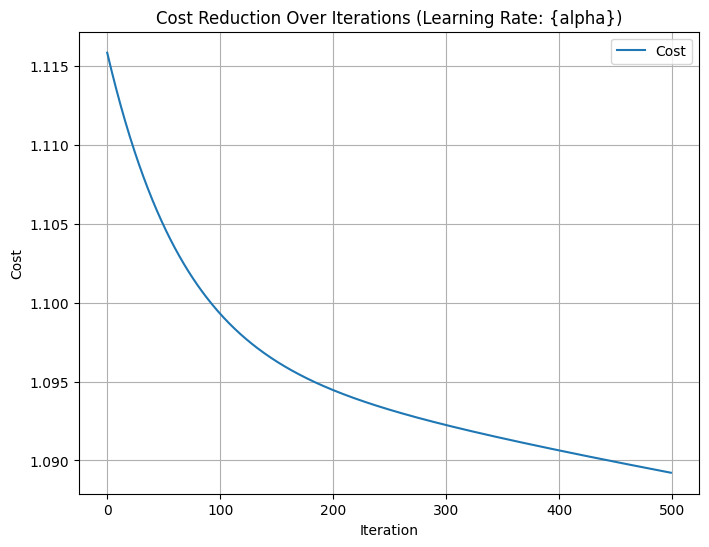

Initial Cost: 1.1158608479596404
Final Cost: 1.0892233754862581


In [25]:
# To test a Gradient Descent we plot the Cost vs. Iterations and observe the behaviour and flow of the plot.

def test_gradient_descent_softmax_with_plot():
  # Generate synthetic data for testing
  np.random.seed(0)
  n, d, c = 100, 5, 3 # 100 samples, 5 features, 3 classes
  X = np.random.rand(n, d)
  y_indices = np.random.randint(0, c, size=n)
  y = np.zeros((n, c))
  y[np.arange(n), y_indices] = 1 # One-hot encoding
  # Initialize weights and biases
  W = np.random.rand(d, c)
  b = np.random.rand(c)
  # Parameters for gradient descent
  alpha = 0.01 # Learning rate
  n_iter = 500 # Number of iterations
  # Run gradient descent
  W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)
  # Plot the cost history
  plt.figure(figsize=(8, 6))
  plt.plot(range(n_iter), cost_history, label="Cost")
  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.title("Cost Reduction Over Iterations (Learning Rate: {alpha})")
  plt.legend()
  plt.grid()
  plt.show()
  # Final cost should ideally be less than initial cost
  print(f"Initial Cost: {cost_history[0]}")
  print(f"Final Cost: {cost_history[-1]}")
test_gradient_descent_softmax_with_plot()

In [26]:
import numpy as np
# Prediction Function
def predict_softmax(X, W, b):
  """
  Predict the class labels for input data.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  numpy.ndarray: Predicted class labels of shape (n,).
  """
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return np.argmax(y_pred, axis=1)

In [27]:
def test_predict_softmax():
  # Generate synthetic data for testing
  np.random.seed(0)
  n, d, c = 10, 5, 3 # 10 samples, 5 features, 3 classes
  X = np.random.rand(n, d)
  W = np.random.rand(d, c)
  b = np.random.rand(c)
  # Compute the predictions using the function
  predictions = predict_softmax(X, W, b)
  # Check the shape of the output
  assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"
  # Verify that all predicted labels are within the range of class indices
  assert np.all(predictions >= 0) and np.all(predictions < c), (
  f"Predictions out of range: expected 0 to {c-1}, got {predictions}")
  # Check that the predicted labels are integers
  assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.dtype}"
  print("All tests passed for predict_softmax!")
# Run the test
test_predict_softmax()

All tests passed for predict_softmax!


In [28]:
# Evaluation Function
def evaluate_classification(y_true, y_pred):
  """
  Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
  Parameters:
  y_true (numpy.ndarray): True class labels of shape (n,).
  y_pred (numpy.ndarray): Predicted class labels of shape (n,).
  Returns:
  tuple: Confusion matrix, precision, recall, and F1-score.
  """
  from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
  cm = confusion_matrix(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
  recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
  f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
  return cm, precision, recall, f1

In [29]:
X = df.drop(columns=["air_quality"])
y = pd.Series(df["air_quality"], name="target")
# Display information about the dataset before cleaning
print("Dataset Info:")
X.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   temperature                    5000 non-null   float64
 1   humidity                       5000 non-null   float64
 2   pm2.5                          5000 non-null   float64
 3   pm10                           5000 non-null   float64
 4   no2                            5000 non-null   float64
 5   so2                            5000 non-null   float64
 6   co                             5000 non-null   float64
 7   proximity_to_industrial_areas  5000 non-null   float64
 8   population_density             5000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 351.7 KB


In [30]:
print("\nDataset Description Before Cleaning:")
X.describe()


Dataset Description Before Cleaning:


,temperature,humidity,pm2.5,pm10,no2,so2,co,proximity_to_industrial_areas,population_density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [31]:
X = df.drop(columns=["air_quality"]).to_numpy()
y = pd.Series(df["air_quality"], name="target").to_numpy()
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
y_onehot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [32]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)
# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Assertions to check the shape of X_train_scaled and X_test_scaled
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), f"X_test_scaled shape mismatch: {X_test_scaled.shape}"
print("Shape assertions passed!")
# y_train.shape, y_test.shape

Shape assertions passed!



Training Softmax Regression Model:
Iteration 0: Cost = 1.274671
Iteration 100: Cost = 0.496974
Iteration 200: Cost = 0.408457
Iteration 300: Cost = 0.363302
Iteration 400: Cost = 0.333906
Iteration 500: Cost = 0.312570
Iteration 600: Cost = 0.296102
Iteration 700: Cost = 0.282874
Iteration 800: Cost = 0.271945
Iteration 900: Cost = 0.262724
Iteration 999: Cost = 0.254887


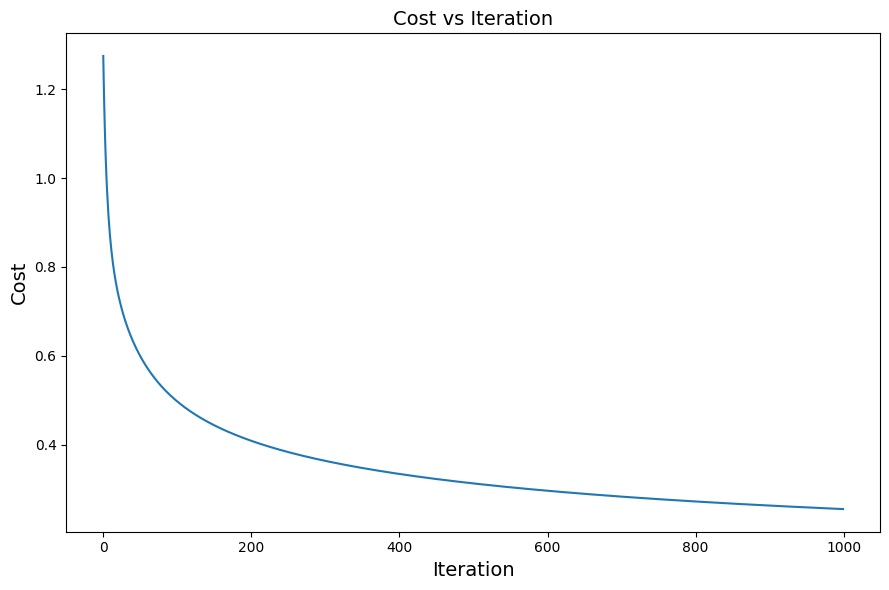

In [33]:
# Intitalizations:
num_classes = y_train.shape[1]
num_features = X_train_scaled.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000
print("\nTraining Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True
)
#Plot Cost Vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()
plt.show()

In [34]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)
# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"Train Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")
y_train_pred.shape

Train Loss (Cost): 0.2549
Test Loss (Cost): 0.2679


(4000,)

In [35]:
y_test.shape

(1000, 4)


Test Accuracy: 0.92%

Confusion Matrix:
[[399   0   1   0]
 [  0  76   0  24]
 [ 12   0 272  16]
 [  1  11  20 168]]
Precision: 0.91
Recall: 0.92
F1-Score: 0.91


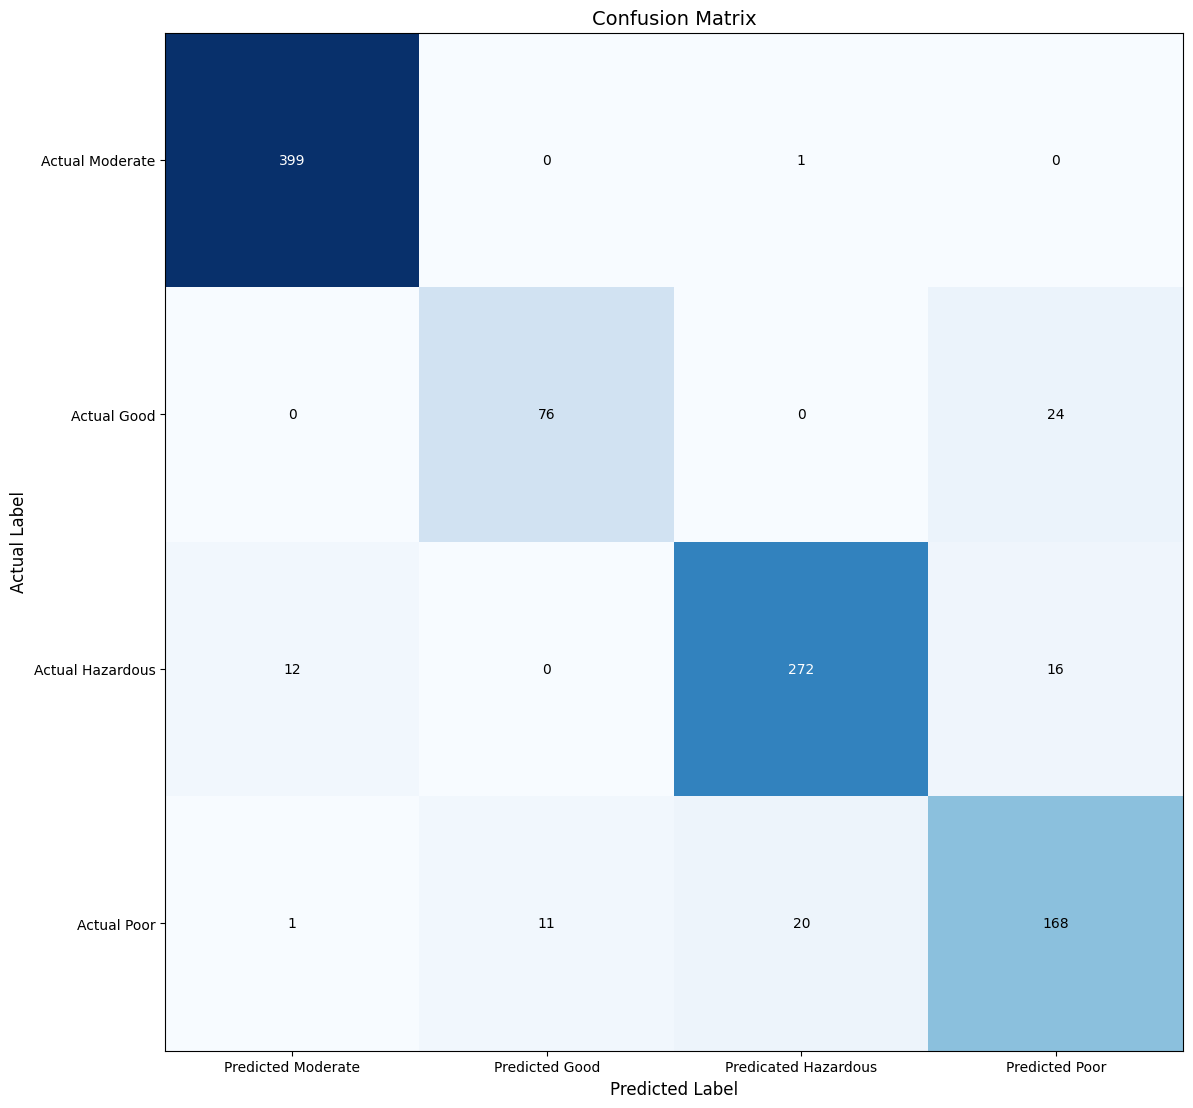

In [36]:
# Accuracy on test data
y_test_true = np.argmax(y_test, axis=1)
test_accuracy = np.mean(y_test_pred==y_test_true)
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
# Evaluation
y_test_true = np.argmax(y_test, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#Optional - Visualizing the COnfusion matrix
# Visualizing Confusion Matrix
# Visualization
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(cm, cmap='Blues') # Use a color map for better visualization
# Set tick labels for the axes
ax.set_xticks(range(4))
ax.set_yticks(range(4))
ax.set_xticklabels(['Predicted Moderate', 'Predicted Good', 'Predicated Hazardous', 'Predicted Poor'])
ax.set_yticklabels(['Actual Moderate', 'Actual Good', 'Actual Hazardous', 'Actual Poor'])
# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()



---



#Ridge Classifier

In [37]:
# Drop target column and prepare data
X = df.drop("air_quality", axis=1)
Y = df["air_quality"]

# Encoding the target labels
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Model Initialization
ridge_classifier = RidgeClassifier()

# Data Fitting
ridge_classifier.fit(X_train, y_train)

# Predictions
Y_pred_ridge = ridge_classifier.predict(X_test)

# Model Evaluation
accuracy_ridge = accuracy_score(y_test, Y_pred_ridge)
precision_ridge = precision_score(y_test, Y_pred_ridge, average='weighted')
recall_ridge = recall_score(y_test, Y_pred_ridge, average='weighted')
f1_ridge = f1_score(y_test, Y_pred_ridge, average='weighted')

print("Ridge Classifier Accuracy:", accuracy_ridge)
print("Ridge Classifier Precision:", precision_ridge)
print("Ridge Classifier Recall:", recall_ridge)
print("Ridge Classifier F1 Score:", f1_ridge)


Ridge Classifier Accuracy: 0.738
Ridge Classifier Precision: 0.7215594983881877
Ridge Classifier Recall: 0.738
Ridge Classifier F1 Score: 0.7126883952375236


###Confusion Matrix for Ridge Classifier

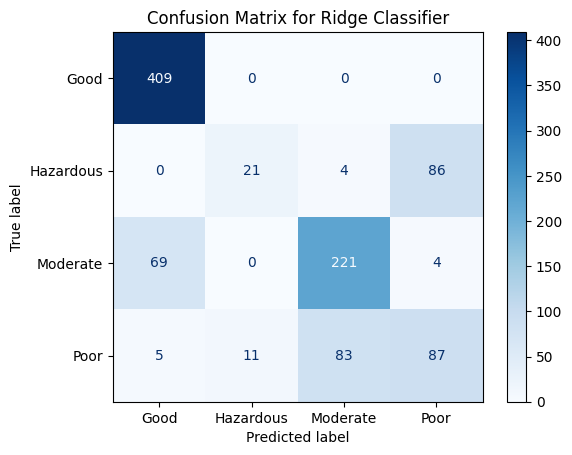

In [52]:
# Generate the confusion matrix
conf_matrix_ridge = confusion_matrix(y_test, Y_pred_ridge)

# Display the confusion matrix using a heatmap-style plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ridge, display_labels=encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Ridge Classifier")
plt.show()

#SVC

In [39]:
# Drop target column and prepare data
X = df.drop("air_quality", axis=1)
Y = df["air_quality"]

# Encoding the target labels
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Model Initialization
svc_classifier = SVC()

# Data Fitting
svc_classifier.fit(X_train, y_train)

# Predictions
Y_pred_svc = svc_classifier.predict(X_test)

# Model Evaluation
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
precision_svc = precision_score(y_test, Y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, Y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, Y_pred_svc, average='weighted')

print("Support Vector Classifier (SVC) Accuracy:", accuracy_svc)
print("SVC Precision:", precision_svc)
print("SVC Recall:", recall_svc)
print("SVC F1 Score:", f1_svc)


Support Vector Classifier (SVC) Accuracy: 0.942
SVC Precision: 0.9423663104259715
SVC Recall: 0.942
SVC F1 Score: 0.9418998771312675


### Confusion Matrix for SVC

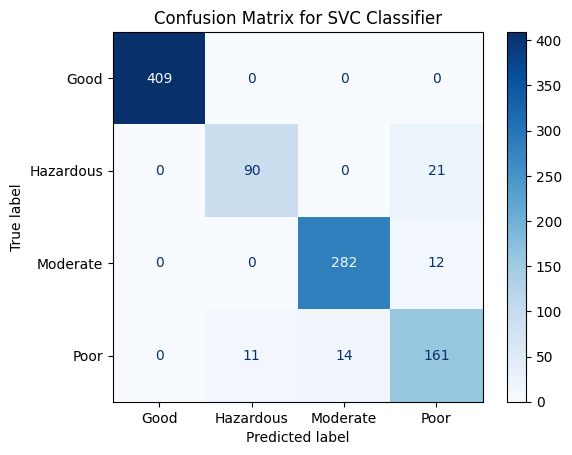

In [54]:
# Generate the confusion matrix
conf_matrix_svc = confusion_matrix(y_test, Y_pred_svc)

# Display the confusion matrix using a heatmap-style plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svc, display_labels=encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVC Classifier")
plt.show()

# Random Forest Classifier

In [40]:
# Drop target column and prepare data
X = df.drop("air_quality", axis=1)
Y = df["air_quality"]

# Encoding the target labels
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# Model Initialization
random_forest_classifier = RandomForestClassifier()

# Data Fitting
random_forest_classifier.fit(X_train, y_train)

# Predictions
Y_pred_rf = random_forest_classifier.predict(X_test)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, Y_pred_rf)
precision_rf = precision_score(y_test, Y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, Y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, Y_pred_rf, average='weighted')

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Precision:", precision_rf)
print("Random Forest Classifier Recall:", recall_rf)
print("Random Forest Classifier F1 Score:", f1_rf)


Random Forest Classifier Accuracy: 0.959
Random Forest Classifier Precision: 0.9594993462408851
Random Forest Classifier Recall: 0.959
Random Forest Classifier F1 Score: 0.9590900392005656


### Confusion Matrix for Random Forest Classifier

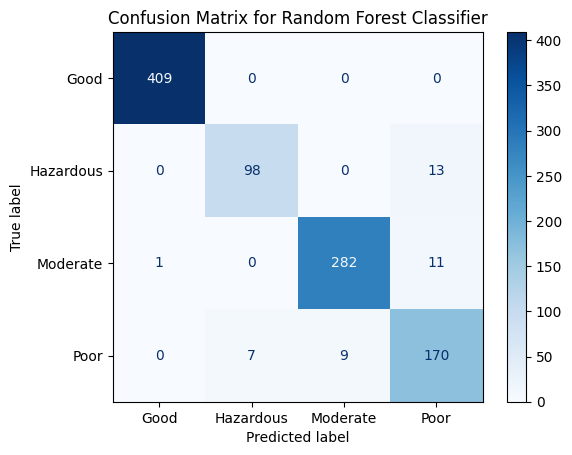

In [55]:
# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, Y_pred_rf)

# Display the confusion matrix using a heatmap-style plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [41]:
# Compare classifiers based on F1 scores
if (f1_ridge > f1_rf) and (f1_ridge > f1_svc):
    print("Conclusion: Ridge Classifier outperformed Random Forest and SVC based on F1 score.")
elif (f1_rf > f1_ridge) and (f1_rf > f1_svc):
    print("Conclusion: Random Forest Classifier outperformed Ridge Classifier and SVC based on F1 score.")
elif (f1_svc > f1_ridge) and (f1_svc > f1_rf):
    print("Conclusion: SVC outperformed Ridge Classifier and Random Forest based on F1 score.")
else:
    print("There is a tie or close performance between two or more models.")

Conclusion: Random Forest Classifier outperformed Ridge Classifier and SVC based on F1 score.


#Hyper-parameter Optimizations with Cross Validations

# Hyper-parameter Optimizations with Cross Validations For Ridge Classifier

In [42]:
# Define hyperparameter grid for Ridge Classifier
param_distribution_ridge = {'alpha': [0.005, 0.05, 0.5, 5, 50]}  # Regularization strengths

# Initialize Ridge Classifier model
ridge_classifier = RidgeClassifier()

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_ridge = RandomizedSearchCV(
    estimator=ridge_classifier,
    param_distributions=param_distribution_ridge,  # No extra dict wrapping
    n_iter=5,
    cv=4,
    scoring='f1_weighted',
    random_state=42
)

# Fit to the training data
random_search_ridge.fit(X_train, y_train)

# Display the best hyperparameters
optimal_params_ridge = random_search_ridge.best_params_
print("Optimal Hyperparameters for Ridge Classifier:", optimal_params_ridge)


Optimal Hyperparameters for Ridge Classifier: {'alpha': 0.005}


#Hyper-parameter Optimizations with Cross Validations For SVC

In [43]:
# Define hyperparameter grid for SVC
param_distribution_svc = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': ['scale', 'auto'],    # Kernel coefficient
    'kernel': ['linear', 'rbf']    # Different kernel functions
}

# Initialize SVC model
svc_classifier = SVC()

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_svc = RandomizedSearchCV(
    estimator=svc_classifier,
    param_distributions=param_distribution_svc,
    n_iter=6, cv=4, scoring='f1_weighted', random_state=42
)

# Fit to the training data
random_search_svc.fit(X_train, y_train)

# Display the best hyperparameters
optimal_params_svc = random_search_svc.best_params_
print("Optimal Hyperparameters for SVC Classifier:", optimal_params_svc)

Optimal Hyperparameters for SVC Classifier: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


#Hyper-parameter Optimizations with Cross Validations For Random Forest Classifier

In [44]:
# Define hyperparameter grid for Random Forest Classifier
param_grid_forest_classifier = {
    'n_estimators': [50],         # Number of trees
    'max_depth': [15],            # Maximum depth per tree
    'min_samples_split': [3],     # Minimum samples to split a node
    'min_samples_leaf': [2],      # Minimum samples per leaf node
}

# Initialize Random Forest Classifier
forest_classifier = RandomForestClassifier(random_state=7)

# Perform GridSearchCV for hyperparameter tuning
grid_search_forest_classifier = GridSearchCV(
    estimator=forest_classifier, param_grid=param_grid_forest_classifier,
    cv=4, scoring='f1_weighted'
)

# Fit to the training data
grid_search_forest_classifier.fit(X_train, y_train)

# Display the best hyperparameters
optimal_params_forest_classifier = grid_search_forest_classifier.best_params_
print("Optimal Hyperparameters for Random Forest Classifier:", optimal_params_forest_classifier)


Optimal Hyperparameters for Random Forest Classifier: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


In [45]:
# Summarize the best hyperparameters for all models
print("Results of Hyperparameter Tuning:")
print(f"Model 1 (Ridge Classifier): Best Parameters: {optimal_params_ridge}")
print(f"Model 2 (SVC Classifier): Best Parameters: {optimal_params_svc}")
print(f"Model 3 (Random Forest Classifier): Best Parameters: {optimal_params_forest_classifier}")

Results of Hyperparameter Tuning:
Model 1 (Ridge Classifier): Best Parameters: {'alpha': 0.005}
Model 2 (SVC Classifier): Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Model 3 (Random Forest Classifier): Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


#Feature Selection

#Feature Selection for Ridge Classifier

In [46]:
# Model: Ridge Classifier with optimal hyperparameters from the previous step
ridge_classifier = RidgeClassifier(alpha=optimal_params_ridge['alpha'])

# Perform Recursive Feature Elimination (RFE)
rfe_ridge_classifier = RFE(estimator=ridge_classifier, n_features_to_select=3)  # Select top 3 features
rfe_ridge_classifier.fit(X_train, y_train)

# Identify selected features
selected_features_ridge = rfe_ridge_classifier.support_  # Boolean mask of selected features
feature_names = ['temperature', 'humidity', 'pm2.5', 'pm10', 'no2',
                 'so2', 'co', 'proximity_to_industrial_areas', 'population_density']
selected_feature_names_ridge = [feature for feature, selected in zip(feature_names, selected_features_ridge) if selected]

print("Best features for Ridge Classifier:", selected_feature_names_ridge)


Best features for Ridge Classifier: ['pm2.5', 'pm10', 'proximity_to_industrial_areas']


#Feature Selection for SVC Model

In [47]:
# Define SVC model (linear kernel necessary for feature ranking)
svc_model = SVC(kernel='linear', C=optimal_params_svc['C'])

# Perform Recursive Feature Elimination (RFE)
rfe_svc = RFE(estimator=svc_model, n_features_to_select=3)
rfe_svc.fit(X_train, y_train)

# Identify selected features
selected_features_svc = rfe_svc.support_
feature_names =  ['temperature', 'humidity', 'pm2.5', 'pm10', 'no2',
                 'so2', 'co', 'proximity_to_industrial_areas', 'population_density']
selected_feature_names_svc = [feature for feature, selected in zip(feature_names, selected_features_svc) if selected]

print("Best features for SVC Classifier:", selected_feature_names_svc)


Best features for SVC Classifier: ['pm2.5', 'pm10', 'co']


#Feature Selection for Random Forest Classifier

In [48]:
# Model: Random Forest Classifier with optimal hyperparameters from previous step
rf_model_classifier = RandomForestClassifier(
    n_estimators=optimal_params_forest_classifier['n_estimators'],
    max_depth=optimal_params_forest_classifier['max_depth'],
    min_samples_split=optimal_params_forest_classifier['min_samples_split'],
    min_samples_leaf=optimal_params_forest_classifier['min_samples_leaf'],
    random_state=42
)

# Fit the model
rf_model_classifier.fit(X_train, y_train)

# Perform feature selection based on importance scores
sfm_rf_classifier = SelectFromModel(rf_model_classifier, threshold="median")
sfm_rf_classifier.fit(X_train, y_train)

# Identify selected features
selected_features_rf_classifier = sfm_rf_classifier.get_support()
selected_feature_names_rf_classifier = [feature for feature, selected in zip(feature_names, selected_features_rf_classifier) if selected]

print("Best features for Random Forest Classifier:", selected_feature_names_rf_classifier)


Best features for Random Forest Classifier: ['temperature', 'no2', 'so2', 'co', 'proximity_to_industrial_areas']


In [49]:
# Summarize the best features for all models
print("Results of Feature Selection:")
print(f"Model 1 (Ridge Classifier): Best Features: {selected_feature_names_ridge}")
print(f"Model 2 (Support Vector Classifier): Best Features: {selected_feature_names_svc}")
print(f"Model 3 (Random Forest Classifier): Best Features: {selected_feature_names_rf_classifier}")

Results of Feature Selection:
Model 1 (Ridge Classifier): Best Features: ['pm2.5', 'pm10', 'proximity_to_industrial_areas']
Model 2 (Support Vector Classifier): Best Features: ['pm2.5', 'pm10', 'co']
Model 3 (Random Forest Classifier): Best Features: ['temperature', 'no2', 'so2', 'co', 'proximity_to_industrial_areas']


In [50]:
# Convert the selected feature names to indices for the classifier model
selected_feature_indices_rf_classifier = [feature_names.index(feature) for feature in selected_feature_names_rf_classifier]

# Select features from X_train and X_test based on the best feature indices
X_train_best_features = X_train[:, selected_feature_indices_rf_classifier]
X_test_best_features = X_test[:, selected_feature_indices_rf_classifier]

# Rebuild the Random Forest Classifier with the best hyperparameters
final_rf_classifier = RandomForestClassifier(
    n_estimators=optimal_params_forest_classifier['n_estimators'],
    max_depth=optimal_params_forest_classifier['max_depth'],
    min_samples_split=optimal_params_forest_classifier['min_samples_split'],
    min_samples_leaf=optimal_params_forest_classifier['min_samples_leaf'],
    random_state=42
)

# Train the final classifier
final_rf_classifier.fit(X_train_best_features, y_train)

# Predict on the test set
y_test_pred_final = final_rf_classifier.predict(X_test_best_features)

# Evaluate the final model's performance
accuracy_final = accuracy_score(y_test, y_test_pred_final)
precision_final = precision_score(y_test, y_test_pred_final, average='weighted')
recall_final = recall_score(y_test, y_test_pred_final, average='weighted')
f1_final = f1_score(y_test, y_test_pred_final, average='weighted')

###Confusion Matrix for Final Model

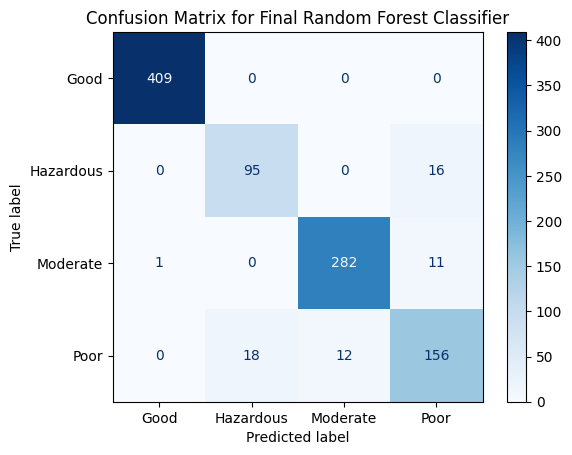

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generte the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

# Displaying the confusion matrix using a heatmap-style plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Final Random Forest Classifier")
plt.show()


In [51]:
# Display detailed evaluation results for the final classifier model
print("Performance Metrics for the Final Classifier Model with Selected Features:")
print(f"Precision: {precision_final}")
print(f"Recall: {recall_final}")
print(f"F1 Score: {f1_final}")
print()
print("Detailed Comparison with the Original Random Forest Classifier Model:")
print("Original Model Performance Metrics:")
print(f" - Accuracy: {accuracy_rf}")
print(f" - Precision: {precision_rf}")
print(f" - Recall: {recall_rf}")
print(f" - F1 Score: {f1_rf}")
print()
print("Final Model Performance Metrics:")
print(f" - Accuracy: {accuracy_final:}")
print(f" - Precision: {precision_final}")
print(f" - Recall: {recall_final}")
print(f" - F1 Score: {f1_final}")
print()
# Performance comparison and conclusion
if f1_final > f1_rf:
    print("Conclusion: The final model, with selected features and optimized hyperparameters, "
          "outperformed the original Random Forest model, demonstrating better classification performance.")
elif f1_final == f1_rf:
    print("Conclusion: The final model performed equally as well as the original Random Forest model.")
else:
    print("Conclusion: The final model, despite feature selection and hyperparameter optimization, did not surpass the performance of the original Random Forest model.")

Performance Metrics for the Final Classifier Model with Selected Features:
Precision: 0.9418784001443671
Recall: 0.942
F1 Score: 0.9419206888978231

Detailed Comparison with the Original Random Forest Classifier Model:
Original Model Performance Metrics:
 - Accuracy: 0.959
 - Precision: 0.9594993462408851
 - Recall: 0.959
 - F1 Score: 0.9590900392005656

Final Model Performance Metrics:
 - Accuracy: 0.942
 - Precision: 0.9418784001443671
 - Recall: 0.942
 - F1 Score: 0.9419206888978231

Conclusion: The final model, despite feature selection and hyperparameter optimization, did not surpass the performance of the original Random Forest model.




---

